# Formula1 Analysis - Season 2020

### Data files : 
1. Drivers
2. Race Results

In [4]:
import numpy as np
import pandas as pd
import datetime
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt

In [5]:
drivers = pd.read_csv('formula1_2020season_drivers.csv')
race_results = pd.read_csv('formula1_2020season_raceResults.csv')

In [6]:
drivers.columns

Index(['Driver', 'Abbreviation', 'Number', 'Team', 'Country', 'Podiums',
       'Points', 'Grands Prix Entered', 'World Championships',
       'Highest Race Finish', 'Highest Grid Position', 'Date of Birth',
       'Place of Birth'],
      dtype='object')

In [7]:
race_results.columns

Index(['Track', 'Position', 'No', 'Driver', 'Team', 'Starting Grid', 'Laps',
       'Total Time/Gap/Retirement', 'Points', 'Fastest Lap'],
      dtype='object')

In [8]:
drivers.head()

,Driver,Abbreviation,Number,Team,Country,Podiums,Points,Grands Prix Entered,World Championships,Highest Race Finish,Highest Grid Position,Date of Birth,Place of Birth
0,Lewis Hamilton,HAM,44,Mercedes,United Kingdom,165,3778,266,7,1(x95),1,07/01/1985,"Stevenage, England"
1,Valtteri Bottas,BOT,77,Mercedes,Finland,56,1512,157,0,1(x9),1,28/08/1989,"Nastola, Finland"
2,Max Verstappen,VER,33,Red Bull Racing,Netherlands,42,1162,119,0,1(x10),1,30/09/1997,"Hasselt, Belgium"
3,Sergio Perez,PER,11,Racing Point,Mexico,10,706,193,0,1(x1),3,26/01/1990,"Guadalajara, Mexico"
4,Daniel Ricciardo,RIC,3,Renault,Australia,31,1159,188,0,1(x7),1,01/07/1989,"Perth, Australia"


In [9]:
race_results.head()

,Track,Position,No,Driver,Team,Starting Grid,Laps,Total Time/Gap/Retirement,Points,Fastest Lap
0,Austria,1,77,Valtteri Bottas,Mercedes,1,71,1:30:55.739,25,No
1,Austria,2,16,Charles Leclerc,Ferrari,7,71,+2.700,18,No
2,Austria,3,4,Lando Norris,McLaren Renault,3,71,+5.491,16,Yes
3,Austria,4,44,Lewis Hamilton,Mercedes,5,71,+5.689,12,No
4,Austria,5,55,Carlos Sainz,McLaren Renault,8,71,+8.903,10,No


### 1. How many drivers are included in the 'Drivers' dataset?


In [10]:
drivers['Driver'].count()

23

### 2. Which driver has the highest number of podium finishes?

In [11]:
highest_podiums = drivers.loc[drivers['Podiums'] == drivers['Podiums'].max()]
highest_podiums['Driver']

0    Lewis Hamilton
Name: Driver, dtype: object

### 3. What is the average number of points scored by the drivers?


In [12]:
race_results['Points'].mean()

5.1

### 4. Which driver has the most world championships?


In [13]:
drivers['Driver'].loc[drivers['World Championships'] == drivers['World Championships'].max()]

0    Lewis Hamilton
Name: Driver, dtype: object

### 5. How many drivers have entered more than 10 Grands Prix?

In [14]:
drivers['Driver'].loc[drivers['Grands Prix Entered'] > 10].count()

21

### 6. Which driver has the highest race finish recorded (in 2020)?


In [15]:
merged_data = pd.merge(race_results, drivers, on='Driver')

# merged_data

# Sort the merged data based on the 'Position' column in descending order
sorted_data = merged_data.sort_values('Position', ascending=False)

# sorted_data

first_pos = sorted_data.loc[sorted_data['Position'] == '1']
first_pos_grp = first_pos.groupby(['No'])
first_pos_grp.get_group(44)

# # Extract the driver with the highest race finish
# driver_highest_race_finish = sorted_data.loc[0]['Driver']

# # Print the result
# print("Driver with the highest race finish:", driver_highest_race_finish)


,Track,Position,No,Driver,Team_x,Starting Grid,Laps,Total Time/Gap/Retirement,Points_x,Fastest Lap,...,Team_y,Country,Podiums,Points_y,Grands Prix Entered,World Championships,Highest Race Finish,Highest Grid Position,Date of Birth,Place of Birth
52,Styria,1,44,Lewis Hamilton,Mercedes,1,71,1:22:50.683,25,No,...,Mercedes,United Kingdom,165,3778,266,7,1(x95),1,07/01/1985,"Stevenage, England"
53,Hungary,1,44,Lewis Hamilton,Mercedes,1,70,1:36:12.473,26,Yes,...,Mercedes,United Kingdom,165,3778,266,7,1(x95),1,07/01/1985,"Stevenage, England"
54,Great Britain,1,44,Lewis Hamilton,Mercedes,1,52,1:28:01.283,25,No,...,Mercedes,United Kingdom,165,3778,266,7,1(x95),1,07/01/1985,"Stevenage, England"
56,Spain,1,44,Lewis Hamilton,Mercedes,1,66,1:31:45.279,25,No,...,Mercedes,United Kingdom,165,3778,266,7,1(x95),1,07/01/1985,"Stevenage, England"
57,Belgium,1,44,Lewis Hamilton,Mercedes,1,44,1:24:08.761,25,No,...,Mercedes,United Kingdom,165,3778,266,7,1(x95),1,07/01/1985,"Stevenage, England"
59,Tuscany,1,44,Lewis Hamilton,Mercedes,1,59,2:19:35.060,26,Yes,...,Mercedes,United Kingdom,165,3778,266,7,1(x95),1,07/01/1985,"Stevenage, England"
61,Eifel,1,44,Lewis Hamilton,Mercedes,2,60,1:35:49.641,25,No,...,Mercedes,United Kingdom,165,3778,266,7,1(x95),1,07/01/1985,"Stevenage, England"
62,Portugal,1,44,Lewis Hamilton,Mercedes,1,66,1:29:56.828,26,Yes,...,Mercedes,United Kingdom,165,3778,266,7,1(x95),1,07/01/1985,"Stevenage, England"
63,Emilia Romagna,1,44,Lewis Hamilton,Mercedes,2,63,1:28:32.430,26,Yes,...,Mercedes,United Kingdom,165,3778,266,7,1(x95),1,07/01/1985,"Stevenage, England"
64,Turkey,1,44,Lewis Hamilton,Mercedes,6,58,1:42:19.313,25,No,...,Mercedes,United Kingdom,165,3778,266,7,1(x95),1,07/01/1985,"Stevenage, England"


### 7. Which driver has the highest grid position achieved (in 2020)?


### 8. How many drivers were born in a specific country (e.g., Germany, Brazil)?


In [16]:
drivers['Place of Birth'] = drivers['Place of Birth'].astype(str)
drivers['Place of Birth'].unique()

array(['Stevenage, England', 'Nastola, Finland', 'Hasselt, Belgium',
       'Guadalajara, Mexico', 'Perth, Australia', 'Madrid, Spain',
       'London, England', 'Monte Carlo, Monaco', 'Bristol, England',
       'Rouen, France', 'Montreal, Canada', 'Evreux, Normandy',
       'Heppenheim, Germany', 'Ufa, Russia', 'Emmerich am Rhein, Germany',
       'Espoo, Finland', 'Martina France, Italy', "King's Lynn, England",
       'Geneva, Switzerland', 'Roskilde, Denmark', 'nan'], dtype=object)

In [17]:
# drivers['Birth Country'] = drivers['Place of Birth'].str.split(',')

# drivers['Place of Birth'].value_counts()

def get_country(place):
    return place.split(',')[-1]

drivers['Birth Country'] = drivers['Place of Birth'].apply(lambda x : get_country(x))


In [18]:
drivers['Birth Country'].value_counts()

Birth Country
 England        4
 Finland        2
 Canada         2
 Germany        2
nan             2
 Belgium        1
 Mexico         1
 Australia      1
 Spain          1
 Monaco         1
 France         1
 Normandy       1
 Russia         1
 Italy          1
 Switzerland    1
 Denmark        1
Name: count, dtype: int64

### 9. What is the distribution of driver ages based on their date of birth?


In [19]:
drivers = drivers.dropna()

In [20]:
drivers['Date of Birth'] = pd.to_datetime(drivers['Date of Birth'], format='%d/%m/%Y')

In [21]:
drivers['Age'] = datetime.datetime.now().year - drivers['Date of Birth'].dt.year

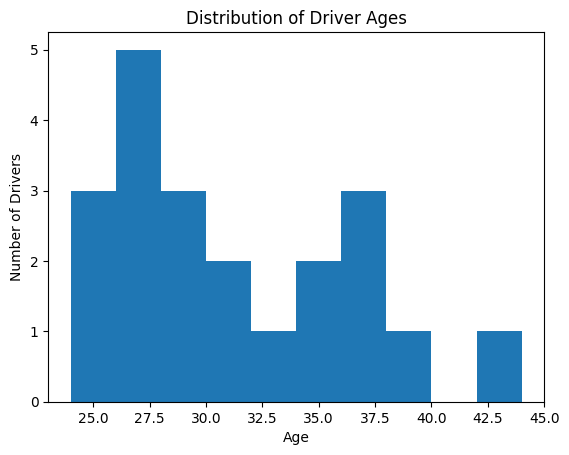

In [22]:
plt.hist(drivers['Age'], bins=10)
plt.xlabel('Age')
plt.ylabel('Number of Drivers')
plt.title('Distribution of Driver Ages')
plt.show()

### 10. Which team has the most drivers in the 'Drivers' dataset?

In [23]:
team_counts = drivers['Team'].value_counts()
max_drivers = team_counts.idxmax()
print(f"Team with most drivers : {max_drivers}")

Team with most drivers : Racing Point


### Q11: Which driver has the most podium finishes in the 'Race Results' dataset?

First, we need to convert the Position values from string to integer. 

In [24]:
race_results['Position'].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', 'NC', '14', '15', '16', '17', '18', '19'], dtype=object)

In [25]:
def convert(x):
    if x=='NC':
        return -1
    else :
        return int(x)


race_results['Position'] = race_results['Position'].apply(lambda x : convert(x))

In [26]:
podium_counts = race_results[race_results['Position'] <= 3]['Driver'].value_counts()

driver_with_most_podiums = podium_counts.idxmax()

most_podiums_count = podium_counts.max()

print("Driver with the most podium finishes:", driver_with_most_podiums)
print("Number of podium finishes:", most_podiums_count)

Driver with the most podium finishes: Max Verstappen
Number of podium finishes: 16


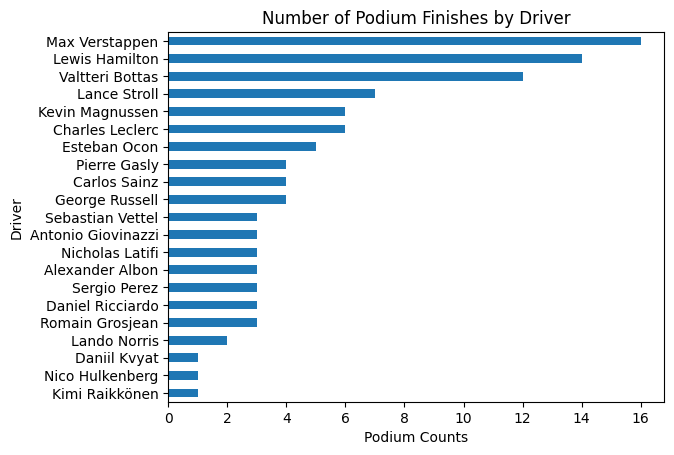

In [27]:
podium_counts = podium_counts.sort_values(ascending=True)

podium_counts.plot(kind='barh')
plt.ylabel('Driver')
plt.xlabel('Podium Counts')
plt.title('Number of Podium Finishes by Driver')
# plt.xticks(rotation=90)
plt.show()

### 12. How many drivers have retired during a race?

In [28]:
race_results['Total Time/Gap/Retirement'].value_counts()['DNF']

55

In [29]:
tracks = race_results['Track'].unique()
tracks.sort()
tracks

array(['70th Anniversary', 'Abu Dhabi', 'Austria', 'Bahrain', 'Belgium',
       'Eifel', 'Emilia Romagna', 'Great Britain', 'Hungary', 'Italy',
       'Portugal', 'Russia', 'Sakhir', 'Spain', 'Styria', 'Turkey',
       'Tuscany'], dtype=object)

In [30]:
Retired_drivers_count = []

def Get_num_retired_drivers(track):
    filt = (race_results['Track'] == track) & (race_results['Total Time/Gap/Retirement'] == 'DNF')
    dnf_drivers = race_results.loc[filt]
    count = dnf_drivers.shape[0]
    Retired_drivers_count.append(count)
    
    
for track in tracks:
    Get_num_retired_drivers(track)
    

print(tracks)
Retired_drivers_count

['70th Anniversary' 'Abu Dhabi' 'Austria' 'Bahrain' 'Belgium' 'Eifel'
 'Emilia Romagna' 'Great Britain' 'Hungary' 'Italy' 'Portugal' 'Russia'
 'Sakhir' 'Spain' 'Styria' 'Turkey' 'Tuscany']


[1, 1, 9, 3, 2, 5, 5, 2, 1, 4, 1, 2, 3, 1, 3, 4, 8]

Text(0, 0.5, 'Track')

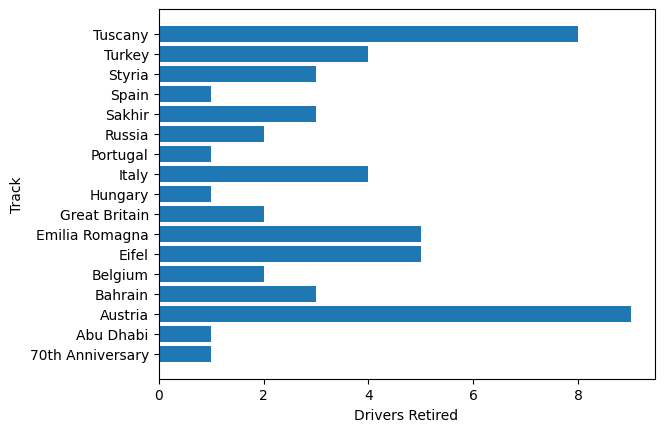

In [31]:
plt.barh(tracks, Retired_drivers_count)
plt.xlabel('Drivers Retired')
plt.ylabel('Track')

### 13. What is the average number of laps completed per race?

In [32]:
laps = []

def get_laps(x):
    x_laps = race_results[race_results['Track'] == x]['Laps'].max()
    laps.append(x_laps)

for track in tracks:
    get_laps(track)

total_laps = sum(laps)
num_tracks = len(tracks)
avg = total_laps/num_tracks

print('The average number of laps for all races : ', avg)

The average number of laps for all races :  61.0


### 14. Which driver has the most fastest laps recorded?

In [33]:
fastest_laps = race_results[race_results['Fastest Lap']=='Yes']['Driver'].value_counts()

driver_with_most_fastest_laps = fastest_laps.idxmax()
num_of_fastest_laps = fastest_laps.max()

print('Driver with most fastest laps : ', driver_with_most_fastest_laps, '->', num_of_fastest_laps)

Driver with most fastest laps :  Lewis Hamilton -> 6


### 15 : What is the total number of points scored by each team in the 2020 F1 season?

In [34]:
teams = race_results['Team'].unique()
points = []

In [35]:
constructors = pd.DataFrame()
constructors['Team'] = teams

In [36]:
constructors

,Team
0,Mercedes
1,Ferrari
2,McLaren Renault
3,Racing Point BWT Mercedes
4,AlphaTauri Honda
5,Renault
6,Alfa Romeo Racing Ferrari
7,Williams Mercedes
8,Red Bull Racing Honda
9,Haas Ferrari


In [37]:
points = []

def calculate_points(x):
#     filt = race_results
    team_points = race_results[race_results['Team'] == x]['Points'].sum()
    points.append(team_points)
    
for team in teams:
    calculate_points(team)
    
points

[573, 131, 202, 210, 107, 181, 8, 0, 319, 3]

In [38]:
constructors['Points'] = points

In [39]:
constructors.sort_values(by='Points', inplace=True, ascending=False)
constructors.reset_index(inplace=True)

In [40]:
constructors.drop(columns=['index'], inplace=True)

In [41]:
constructors

,Team,Points
0,Mercedes,573
1,Red Bull Racing Honda,319
2,Racing Point BWT Mercedes,210
3,McLaren Renault,202
4,Renault,181
5,Ferrari,131
6,AlphaTauri Honda,107
7,Alfa Romeo Racing Ferrari,8
8,Haas Ferrari,3
9,Williams Mercedes,0


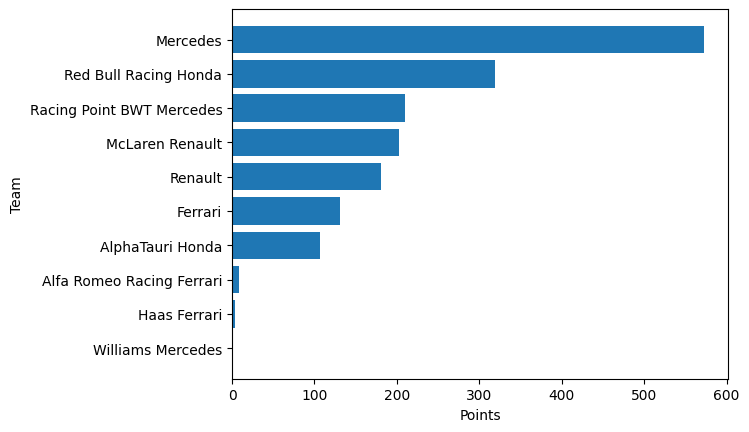

In [42]:
plt.barh(constructors['Team'], constructors['Points'])
plt.xlabel('Points')
plt.ylabel('Team')
plt.gca().invert_yaxis()
plt.show()